# Exploratory Data Analysis

In [200]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder

# ann and dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

# Reading the data

In [129]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [130]:
df.shape

(1470, 35)

# Missing Values Treatment

In [131]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# The Features and the 'Target'

In [132]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [133]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In all we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

Hence this is a Binary Classification problem.

# Univariate Analysis

In this section I have done the univariate analysis i.e. I have analysed the range or distribution of the values that various features take. To better analyze the results I have plotted various graphs and visualizations wherever necessary.

In [134]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Let us first analyze the various numeric features. To do this we can actually plot a boxplot showing all the numeric features.

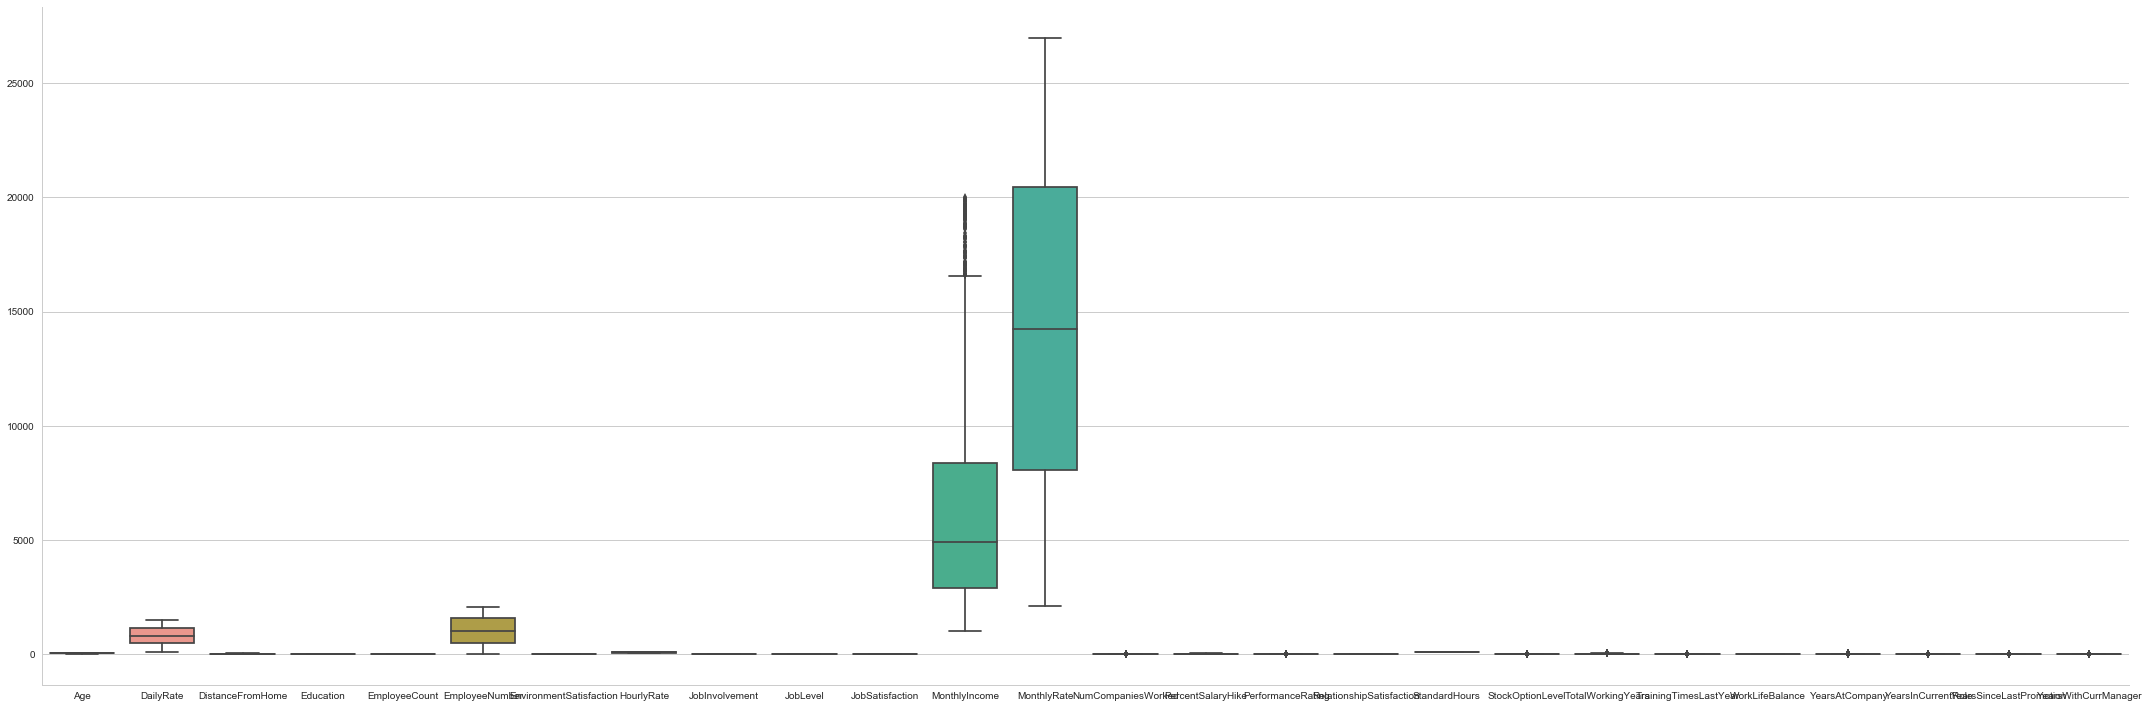

In [135]:
sns.factorplot(data=df,kind='box',size=10,aspect=3)

Note that all the features have pretty different scales and so plotting a boxplot is not a good idea. Instead what we can do is plot histograms of various continuously distributed features.

We can also plot a kdeplot showing the distribution of the feature. Below I have plotted a kdeplot for the 'Age' feature. Similarly we plot for other numeric features also. We can also use a distplot from seaborn library.

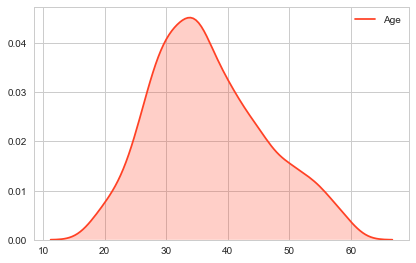

In [136]:
sns.kdeplot(df['Age'],shade=True,color='#ff4125')

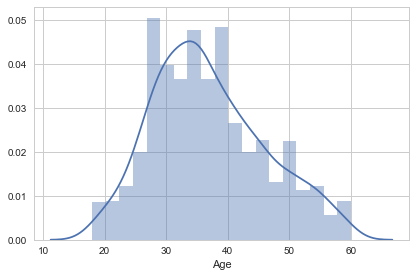

In [137]:
sns.distplot(df['Age'])

Similarly we can do this for all the numerical features. Below I have plotted the subplots for the other features.

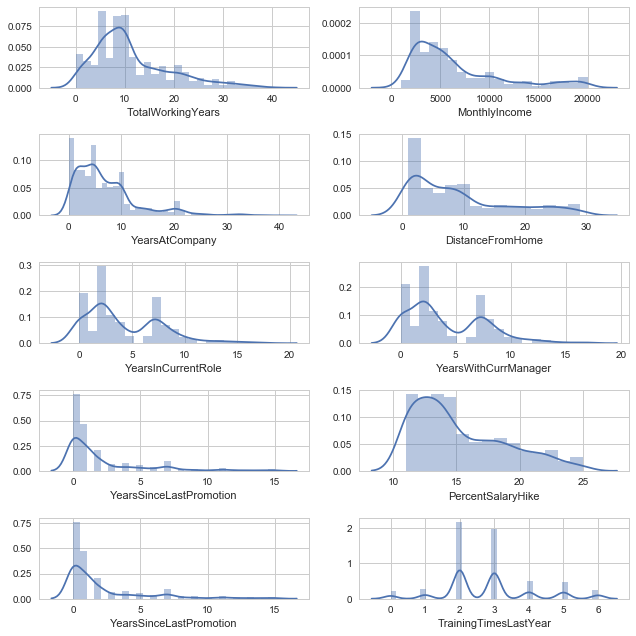

In [138]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

Let us now analyze the various categorical features. Note that in these cases the best way is to use a count plot to show the relative count of observations of different categories.

In [139]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [140]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

I have made a function that accepts the name of a string. In our case this string will be the name of the column or attribute which we want to analyze. The function then plots the countplot for that feature which makes it easier to visualize.

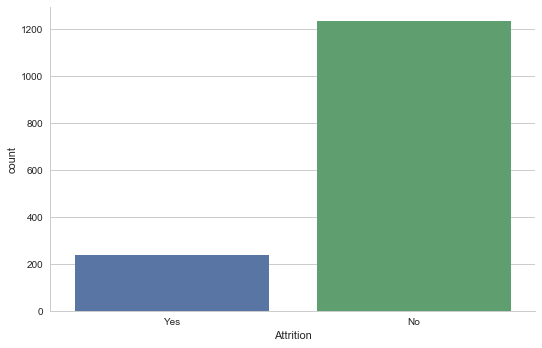

In [141]:
plot_cat('Attrition')  

Note that the number of observations belonging to the 'No' category is way greater than that belonging to 'Yes' category. Hence we have skewed classes and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques. I shall come back to this point later.

Let us now similalry analyze other categorical features

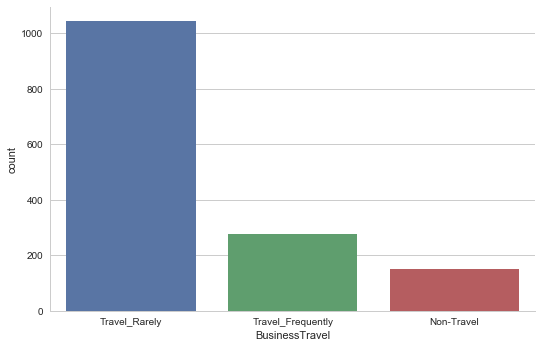

In [142]:
plot_cat('BusinessTravel')   

The above plot clearly shows that most of the people belong to the 'Travel_Rarely' class. This indicates that most of the people did not have a job which asked them for frequent travelling.

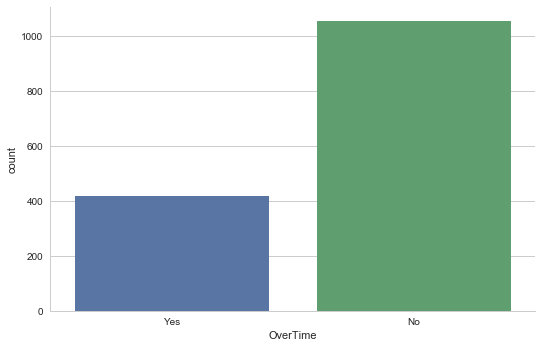

In [143]:
plot_cat('OverTime')

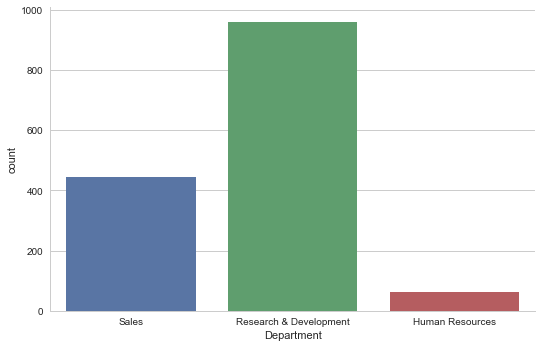

In [144]:
plot_cat('Department')   

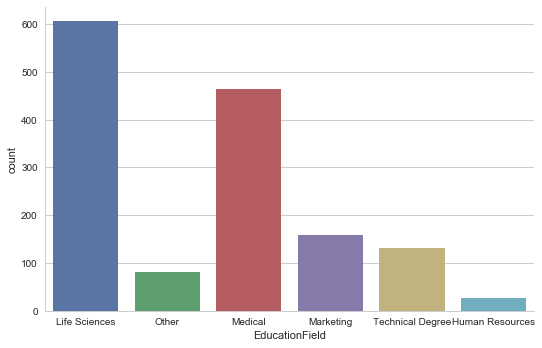

In [145]:
plot_cat('EducationField')

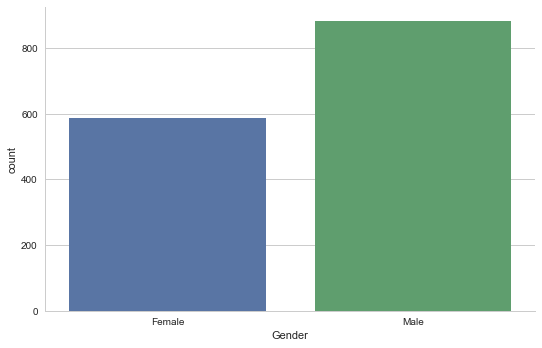

In [146]:
plot_cat('Gender') 

Note that males are presnt in higher number.

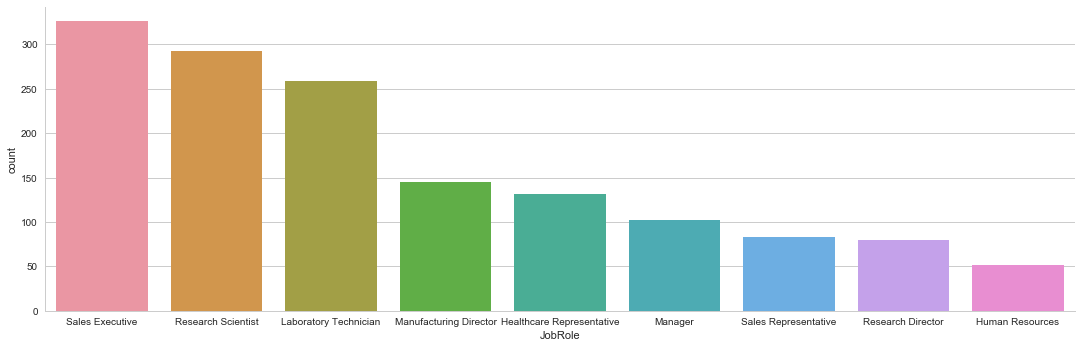

In [147]:
plot_cat('JobRole')   

Similarly we can continue for other categorical features.
Note that the same function can also be used to better analyze the numeric discrete features like 'Education' ,'JobSatisfaction' etc...

# Corelation b/w Features

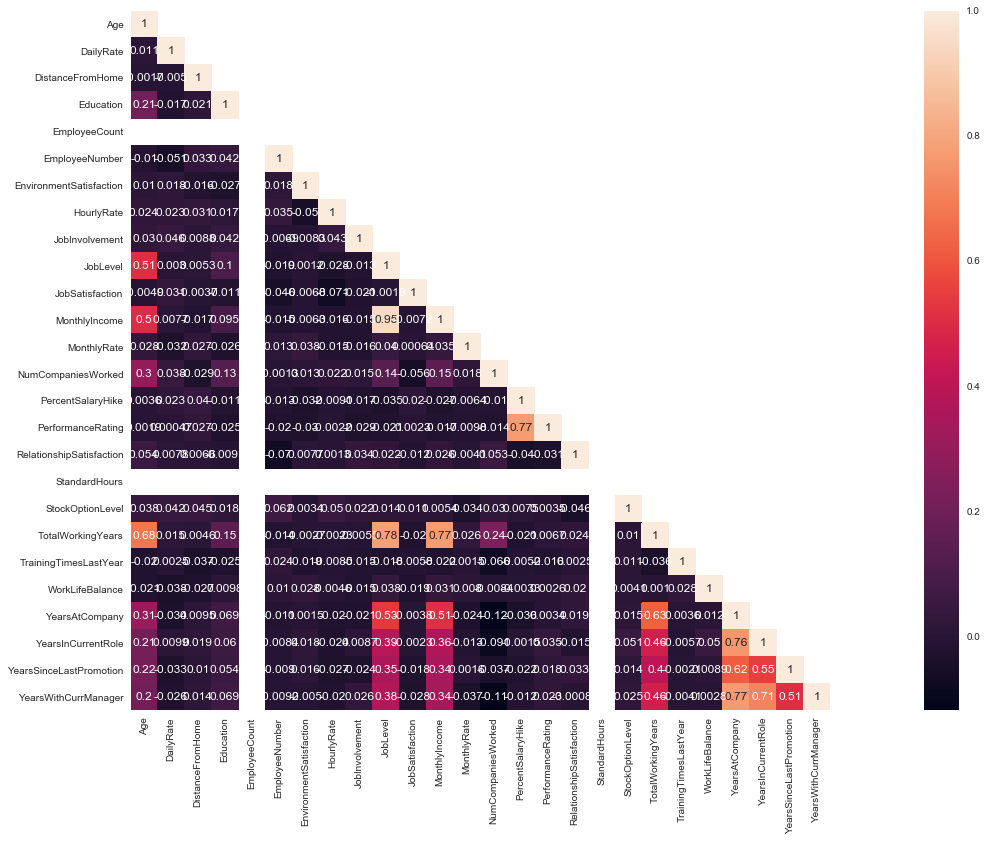

In [148]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

BREAKING IT DOWN
Firstly calling .corr() method on a pandas data frame returns a corelation data frame containing the corelation values b/w the various attributes. now we obtain a numpy array from the corelation data frame using the np.array method. nextly using the np.tril_indices.from() method we set the values of the lower half of the mask numpy array to False. this is bcoz on passing the mask to heatmap function of the seaborn it plots only those squares whose mask is False. therefore if we don't do this then as the mask is by default True then no square will appear. Hence in a nutshell we obtain a numpy array from the corelation data frame and set the lower values to False so that we can visualise the corelation. In order for a full square just use the [:] operator in mask in place of tril_ind... function. in next step we get the refernce to the current figure using the gcf() function of the matplotlib library and set the figure size. in last step we finally pass the necessary parameters to the heatmap function.

DATA=the corelation data frame containing the 'CORELATION' values.

MASK= explained earlier.

vmin,vmax= range of values on side bar

SQUARE= to show each individual unit as a square.

ANNOT- whether to dispaly values on top of square or not. In order to dispaly pass it either True or the cor_mat.

CBAR= whether to view the side bar or not.

SOME INFERENCES FROM THE ABOVE HEATMAP
Self relation ie of a feature to itself is equal to 1 as expected.

JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

MonthlyIncome is very strongly related to joblevel as expected as senior employees will definately earn more.

PerformanceRating is highly related to PercentSalaryHike which is quite obvious.

Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

YearsWithCurrManager is highly related to YearsAtCompany.

YearsAtCompany is related to YearsInCurrentRole.

Note that we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.

# Feature Selection

Age

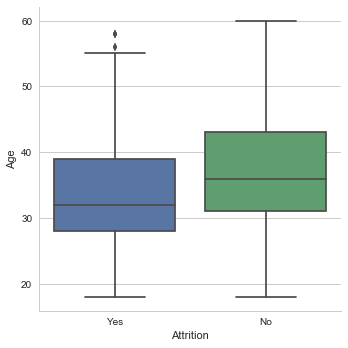

In [149]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

Note that the median as well the maximum age of the peole with 'No' attrition is higher than that of the 'Yes' category. This shows that peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

Department

Note that both Attrition(Target) as well as the Deaprtment are categorical. In such cases a cross-tabulation is the most reasonable way to analyze the trends; which shows clearly the number of observaftions for each class which makes it easier to analyze the results.

In [150]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

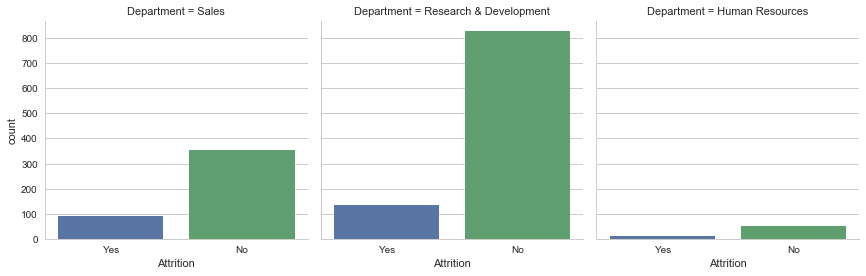

In [151]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [152]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


Note that most of the observations corresspond to 'No' as we saw previously also. About 81 % of the people in HR dont want to leave the organisation and only 19 % want to leave. Similar conclusions can be drawn for other departments too from the above cross-tabulation.

Gender

In [153]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


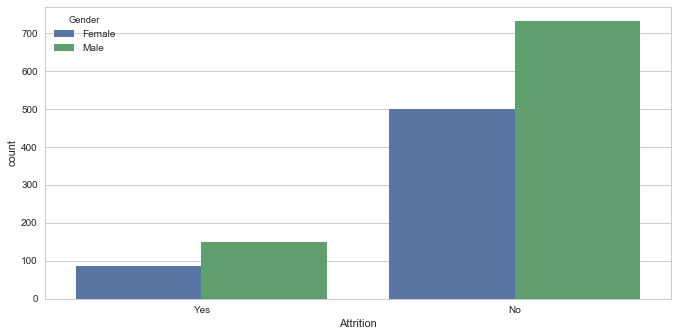

In [154]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Attrition',hue='Gender')

Job Level

In [155]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


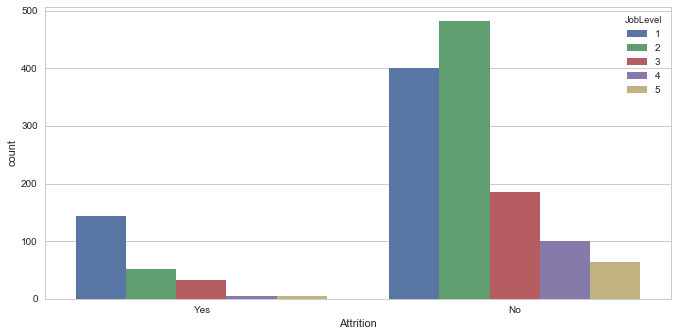

In [156]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Attrition',hue='JobLevel')

People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes'. Similar inferences can be made for other job levels.

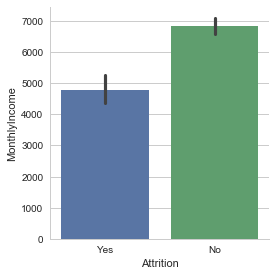

In [157]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

Note that the average income for 'No' class is quite higher and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.

 Job Satisfaction

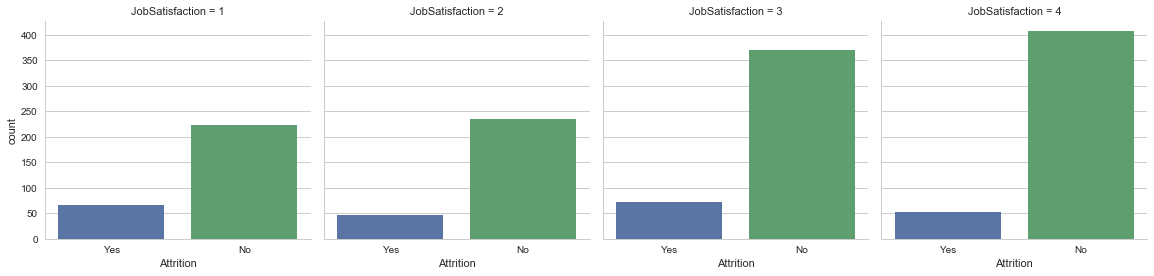

In [158]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [159]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


Note this shows an interesting trend. Note that for higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of them say a 'Yes' which is quite obvious as highly contented workers will obvioulsy not like to leave the organisation.

Environment Satisfaction

In [160]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


Again we can notice that the relative percent of 'No' in people with higher grade of environment satisfacftion.

Job Involvement

In [161]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


Work Life Balance

In [162]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


Again we notice a similar trend as people with better work life balance dont want to leave the organisation.

RelationshipSatisfaction

In [163]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


Notice that I have plotted just some of the important features against out 'Target' variable i.e. Attrition in our case. Similarly we can plot other features against the 'Target' variable and analye the trends i.e. how the feature effects the 'Target' variable.

# Feature Selection

The feature Selection is one of the main steps of the preprocessing phase as the features which we choose directly effects the model performance. While some of the features seem to be less useful in terms of the context; others seem to equally useful. The better features we use the better our model will perform.

We can also use the Recusrive Feature Elimination technique (a wrapper method) to choose the desired number of most important features. The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

We can use it directly from the scikit library by importing the RFE module or function provided by the scikit. But note that since it tries different combinations or the subset of features;it is quite computationally expensive.

In [164]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

# Preparing Dataset
Before feeding our data into a ML model we first need to prepare the data. This includes encoding all the categorical features (either LabelEncoding or the OneHotEncoding) as the model expects the features to be in numerical form. Also for better performance we will do the feature scaling ie bringing all the features onto the same scale by using the StandardScaler provided in the scikit library.

# Feature Encoding

In [165]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [166]:
cat_df=df.select_dtypes(include='object')
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [167]:
df.head() # just to verify.

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


# Feature Scaling
The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler. Below I have used the StandardScaler to scale the data.

Note that the neural networks are quite sensitive towards the scale of the features. Hence it is always good to perform feature scaling on the data before feeding it into an Artificial Neural Network.

In [168]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].values

# Splitting the data into training and validation sets

In [169]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Handling the Imbalanced dataset

Note that we have a imbalanced dataset with majority of observations being of one type ('NO') in our case. In this dataset for example we have about 84 % of observations having 'No' and only 16 % of 'Yes' and hence this is an imbalanced dataset.

To deal with such a imbalanced dataset we have to take certain measures, otherwise the performance of our model can be significantly affected. In this section I have discussed two approaches to curb such datasets.

# Oversampling the Minority or Undersampling the Majority Class

In an imbalanced dataset the main problem is that the data is highly skewed ie the number of observations of certain class is more than that of the other. Therefore what we do in this approach is to either increase the number of observations corressponding to the minority class (oversampling) or decrease the number of observations for the majority class (undersampling).

Note that in our case the number of observations is already pretty low and so oversampling will be more appropriate.

Below I have used an oversampling technique known as the SMOTE(Synthetic Minority Oversampling Technique) which randomly creates some 'Synthetic' instances of the minority class so that the net observations of both the class get balanced out.

One thing more to take of is to use the SMOTE before the cross validation step; just to ensure that our model does not overfit the data; just as in the case of feature selection.

In [170]:
# oversampler=SMOTE(random_state=42)
# x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)

Using the Right Evaluation Metric

Another important point while dealing with the imbalanced classes is the choice of right evaluation metrics.

Note that accuracy is not a good choice. This is because since the data is skewed even an algorithm classifying the target as that belonging to the majority class at all times will achieve a very high accuracy. For eg if we have 20 observations of one type 980 of another ; a classifier predicting the majority class at all times will also attain a accuracy of 98 % but doesnt convey any useful information.

Hence in these type of cases we may use other metrics such as -->

'Precision'-- (true positives)/(true positives+false positives)

'Recall'-- (true positives)/(true positives+false negatives)

'F1 Score'-- The harmonic mean of 'precision' and 'recall'

'AUC ROC'-- ROC curve is a plot between 'senstivity' (Recall) and '1-specificity' (Specificity=Precision)

'Confusion Matrix'-- Plot the entire confusion matrix

# Setting the random seeds
Note that in order to get exactly same results after training an artificial neural network at different instances of time we need to specify the random seed for the Keras backend engine which is TensorFlow in my case. Also I have specified the seeds for the python random module as well as for the numpy.

In order to adjust the weights oof an ANN ; the BackProp algorithm starts with a random weights and hence after a given no of epochs the results can be different if the random initialisation of weights is different in starting.

Hence to obtain the same results it is necessary to specify the random seed to get the reproducible results.

In [171]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

# Building the Keras model

In [176]:
model=Sequential()
model.add(Dense(input_dim=23,units=8,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# BREAKING IT DOWN
First we need to build a model. For this we use the Sequential model provided by the Keras which is nothing but a linear stack of layers.
Next we need to add the layers to our Sequential model. For this we use the model.add() function.
Note that for each layer we need to specify the number of units ( or the number of neurons) and also the activation function used by the neurons.

Note that activation function is used to model complex non-linear relationships and their are many choices. But generally it is preferred to use 'relu' function for the hidden layers and the 'sigmoid' or the 'logistic' function for the output layer. For a multi-class classification problem we can use the 'softmax' function as the activation function for the output layer.

Note that the first layer and ONLY the first layer expects the input dimensions in order to know the shape of the input numpy array.
Finally note that the number of units or neurons in the final layer is equal to the number of classes of the target variable. In other words for a 'n' class classification problem we shall have 'n' neurons in the output layer.

Each neuron represents a specific target class. The output of each neuron in the final layer thus represents the probability of given observation being classified to that target class. The observation is classified to the target class; the neuron corressponding to which has the highest value.

# Compiling the Keras model

In [177]:
model.compile(optimizer=Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])

# BREAKING IT DOWN
Now we need to compile the model. We have to specify the optimizer used by the model We have many choices like Adam, RMSprop etc.. Rfer to Keras doc for a comprehensive list of the optimizers available.
Next we need to specify the loss function for the neural network which we seek to minimize.

I have used the 'binary_crossentropy' loss function since this is a binary classification problem. For a multi-class classification problems we may use the 'categorical_crossentropy'.

Next we need to specify the metric to evaluate our models performance. Here I have used accuracy.

# Summary of the model

In [178]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 192       
_________________________________________________________________
dense_8 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


Provides overall description of the model.

# Fitting the model on the training data and testing on the validation set

In [205]:
History=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Train on 1102 samples, validate on 368 samples
Epoch 1/10
1102/1102 [==============================] - 0s 65us/step - loss: 0.2889 - acc: 0.8784 - val_loss: 0.3515 - val_acc: 0.8777
Epoch 2/10
1102/1102 [==============================] - 0s 47us/step - loss: 0.2854 - acc: 0.8793 - val_loss: 0.3529 - val_acc: 0.8886
Epoch 3/10
1102/1102 [==============================] - 0s 58us/step - loss: 0.2846 - acc: 0.8884 - val_loss: 0.3612 - val_acc: 0.8832
Epoch 4/10
1102/1102 [==============================] - 0s 44us/step - loss: 0.2826 - acc: 0.8848 - val_loss: 0.3590 - val_acc: 0.8859
Epoch 5/10
1102/1102 [==============================] - 0s 58us/step - loss: 0.2769 - acc: 0.8757 - val_loss: 0.3749 - val_acc: 0.8832
Epoch 6/10
1102/1102 [==============================] - 0s 40us/step - loss: 0.2697 - acc: 0.8875 - val_loss: 0.3809 - val_acc: 0.8859
Epoch 7/10
1102/1102 [==============================] - 0s 40us/step - loss: 0.2576 - acc: 0.8893 - val_loss: 0.3947 - val_acc: 0.8777
Epoch 8/

# BREAKING IT DOWN
Lastly we need to fit our model onto the training data just as we do for traditional ML algorithms.
We have to specify the training(x_train ,y_train) and the testing (validation_data) sets.
We also need to specify the 'number of epochs'. An 'epoch' is one entire cycle of 'Forward & Backward propagation' through all the training examples.
Verbose is an optional parameter that just ensures how the output of each epoch is displayed on the screen.
We have assigned it to a 'History' variable to retrieve the model performance during each epoch in the future.

# Making Predictions

In [195]:
model.predict_classes(x_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [196]:
pred = model.predict(x_test)

# Evaluating the Model Performance

In [182]:
model.evaluate(x_test,y_test)

368/368 [==============================] - 0s 43us/step


[0.3540456087692924, 0.8777173913043478]

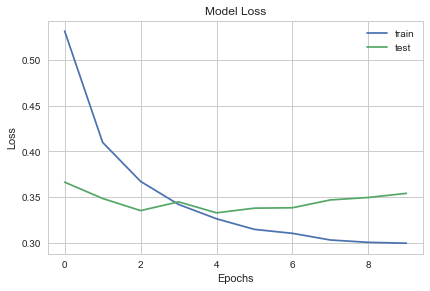

In [183]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

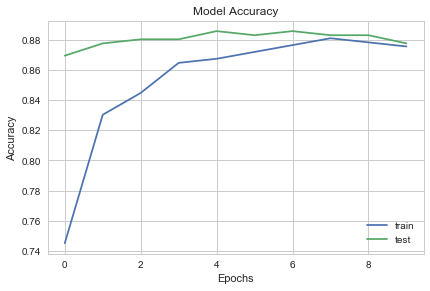

In [184]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()